# Prerequisites

In this task, we will be comparing the random forest to single trees for breast cancer diagnostics. This is the same prediction task that we tackled in the "Module-4-Decision-Tree-Assignment.ipynb" notebook. Therefore, you should reuse your solution from that assignment. If you no longer have that assignment or want a fresh start, we will distribute the "Module-4-Decision-Tree-Assignment-With-Answers.ipynb" notebook for you to use. Our intent is that you can add some code to that notebook to satisfy this assignment

# Tools

The new classifier you will need is the RandomForestClassifier:

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

It has the "fit" and "predict" methods like any other sklearn classifier. 

You will want to take careful notice of the "estimators_" attribute. This is a list of DecisionTreeClassifiers. You will need to iterate this list to evaluate the individual trees separately. You can also adjust the number of estimators with the "n_estimators" parameter in the RandomForestClassifier constructor. 



# Tasks

### 1) Add Necessary Imports

At the very least you will have to add "RandomForestClassifier" and "test_train_split" to the 

### 2) Add a RandomForestClassifier to the Cross Validation

Compare the results of RandomForestClassifier to the DecisionTreeClassifier already there. You probably want to keep "max_depth" the same for both classifiers, but how you explore this exactly is up to you. I recommend setting "class_weight="balanced"" for both classifiers. Try playing with the "n_estimators" argument.

### 3) Visualize and Evaluate the Individual Trees in the Forest

Add a new code block at the end of the notebook. Use "train_test_split" to divide the features and labels into train and test sets. Train a RandomForestClassifier on the train data and evaluate it on the test data. Then for each tree that bleongs to the forest, evaluate it on the test data and visualize the tree. Remember that you can use display_tree in this notebook.


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from graphviz import Source
import pydot_ng as pydot
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [3]:
# load the following data frame
cancer_df = pd.read_csv("breast-cancer-data.csv")

In [4]:
#EDA

In [5]:
cancer_df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
cancer_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
# sets the random seed. This makes it so your experiments are reproducible
np.random.seed(1337)

# the label column is call diagnosis. Grab just that column and
# convert to 1 or 0
label_column_name = "diagnosis"
labels = cancer_df.loc[:, label_column_name]
labels = labels.apply(lambda x: 1 if x=="M" else 0)

# everything from column 2 and on is a feature
feat_column_names = list(cancer_df.columns[2:-1])
features = cancer_df.loc[:, feat_column_names]

In [47]:
skf = StratifiedKFold(n_splits=5, shuffle=True)

tree_preds= []
tree_lbls = []

forest_preds = []
forest_lbls = []

for train_indices, test_indices in skf.split(features, labels):
    train_features = features.iloc[train_indices]
    train_labels = labels.iloc[train_indices]

    model_tree = DecisionTreeClassifier(class_weight = 'balanced')
    model_tree.fit(train_features,train_labels)

    model_forest = RandomForestClassifier(class_weight = 'balanced')
    model_forest.fit(train_features, train_labels)

    test_features = features.iloc[test_indices]
    test_labels = labels.iloc[test_indices]
    print (f"Training size: {len(train_features)}, Test size: {len(test_features)}")
    
    tree_preds.extend(model_tree.predict(test_features))
    tree_lbls.extend(test_labels)

    forest_preds.extend(model_forest.predict(test_features))
    forest_lbls.extend(test_labels)





Training size: 455, Test size: 114
Training size: 455, Test size: 114
Training size: 455, Test size: 114
Training size: 455, Test size: 114
Training size: 456, Test size: 113


In [49]:

print(f"The accuracy score of the Decision Tree is: {accuracy_score(tree_lbls,tree_preds)}")
print(f"The precision score of the Decision Tree is: {precision_score(tree_lbls,tree_preds)}")
print(f"The recall score of the Decision Tree is: {recall_score(tree_lbls,tree_preds)}")

The accuracy score of the Decision Tree is: 0.929701230228471
The precision score of the Decision Tree is: 0.9018691588785047
The recall score of the Decision Tree is: 0.910377358490566


In [51]:

print(f"The accuracy score of the Random Forest is: {accuracy_score(forest_lbls,forest_preds)}")
print(f"The precision score of the Random Forest is: {precision_score(forest_lbls,forest_preds)}")
print(f"The recall score of the Random Forest is: {recall_score(forest_lbls,forest_preds)}")

The accuracy score of the Random Forest is: 0.961335676625659
The precision score of the Random Forest is: 0.9656862745098039
The recall score of the Random Forest is: 0.9292452830188679


In [52]:
def display_tree(tree):
    """
    args:
        tree -  a DecisionTreeClassifier object that has been trained.
    """
    dot_data = StringIO()
    Source(export_graphviz(tree,
                           out_file=dot_data,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           class_names=["Benign", "Malignant"],
                           feature_names=features.columns))
    graph = pydot.graph_from_dot_data(dot_data.getvalue())

    graph.write_png("tmp_image.png")
    tmp_image = plt.imread("tmp_image.png")

    plt.figure(figsize=(20, 10))
    plt.imshow(tmp_image)
    plt.grid(False)

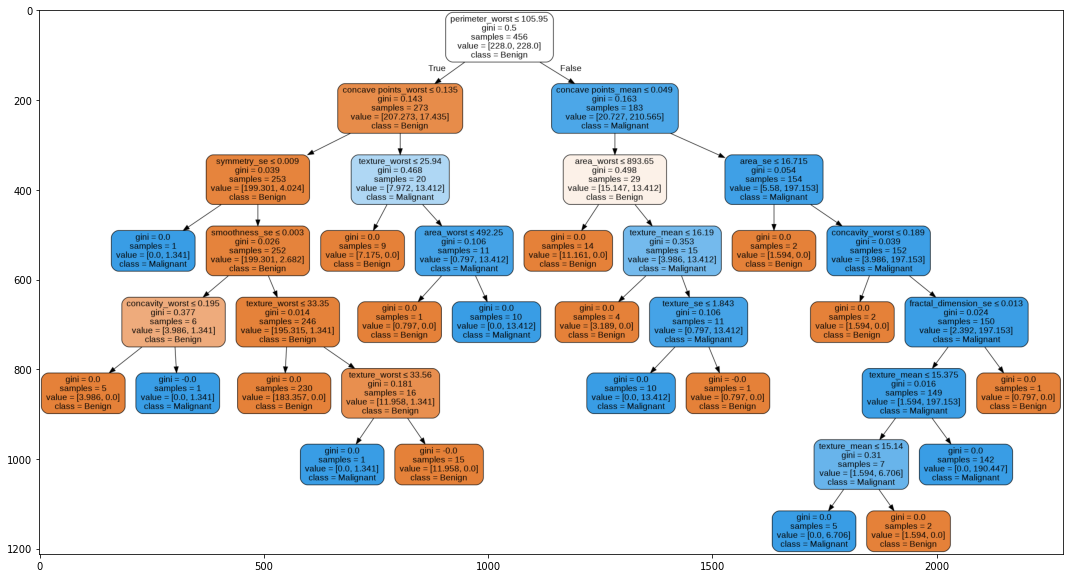

In [53]:
# code goes here
display_tree(model_tree)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

In [60]:
model_forest_2 = RandomForestClassifier(class_weight = 'balanced', n_estimators = 5)

In [61]:
model_forest_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
y_pred = pd.Series(model_forest_2.predict(X_test))

In [72]:
y_pred

0      0
1      1
2      1
3      0
4      0
      ..
183    1
184    1
185    1
186    0
187    0
Length: 188, dtype: int64

In [86]:

print(f"The accuracy score of the Random Forest is: {accuracy_score(y_test,y_pred)}")
print(f"The precision score of the Random Forest is: {precision_score(y_test,y_pred)}")
print(f"The recall score of the Random Forest is: {recall_score(y_test,y_pred)}")

The accuracy score of the Random Forest is: 0.9361702127659575
The precision score of the Random Forest is: 0.9104477611940298
The recall score of the Random Forest is: 0.9104477611940298


In [93]:



for each in range(len(model_forest_2.estimators_)):
  
  y_tree_pred = []
  
  y_tree_pred = pd.Series(model_forest_2.estimators_[each].predict(X_test))

  print(f"The accuracy score of the Decision Tree # {each+1} is: {accuracy_score(y_test,y_tree_pred)}")
  print(f"The precision score of the Decision Tree # {each+1} is: {precision_score(y_test,y_tree_pred)}")
  print(f"The recall score of the Decision Tree # {each+1} is: {recall_score(y_test,y_tree_pred)} \n")  
 


The accuracy score of the Decision Tree # 1 is: 0.9042553191489362
The precision score of the Decision Tree # 1 is: 0.855072463768116
The recall score of the Decision Tree # 1 is: 0.8805970149253731 

The accuracy score of the Decision Tree # 2 is: 0.925531914893617
The precision score of the Decision Tree # 2 is: 0.8732394366197183
The recall score of the Decision Tree # 2 is: 0.9253731343283582 

The accuracy score of the Decision Tree # 3 is: 0.9202127659574468
The precision score of the Decision Tree # 3 is: 0.8939393939393939
The recall score of the Decision Tree # 3 is: 0.8805970149253731 

The accuracy score of the Decision Tree # 4 is: 0.8829787234042553
The precision score of the Decision Tree # 4 is: 0.8260869565217391
The recall score of the Decision Tree # 4 is: 0.8507462686567164 

The accuracy score of the Decision Tree # 5 is: 0.898936170212766
The precision score of the Decision Tree # 5 is: 0.8529411764705882
The recall score of the Decision Tree # 5 is: 0.865671641791

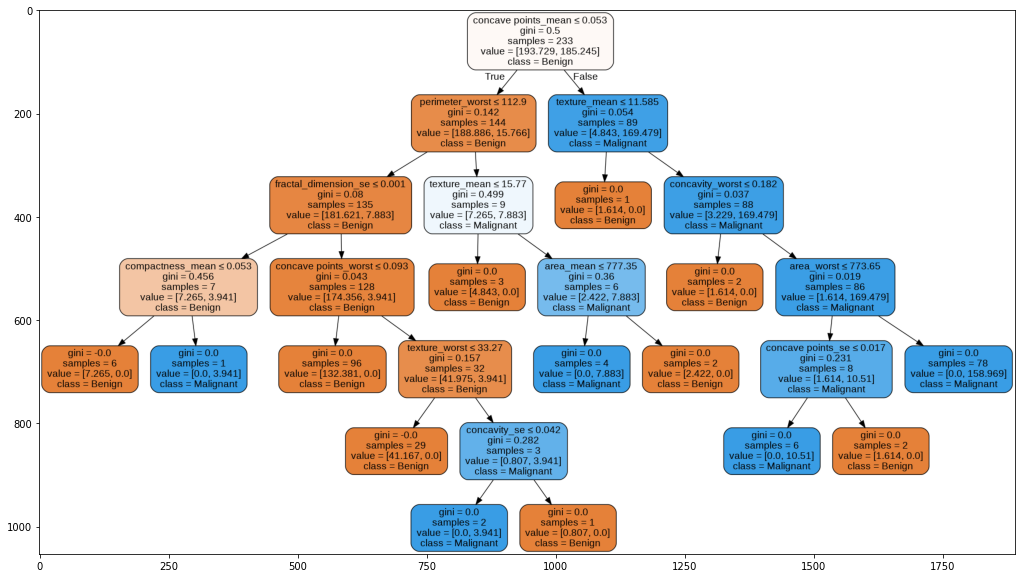

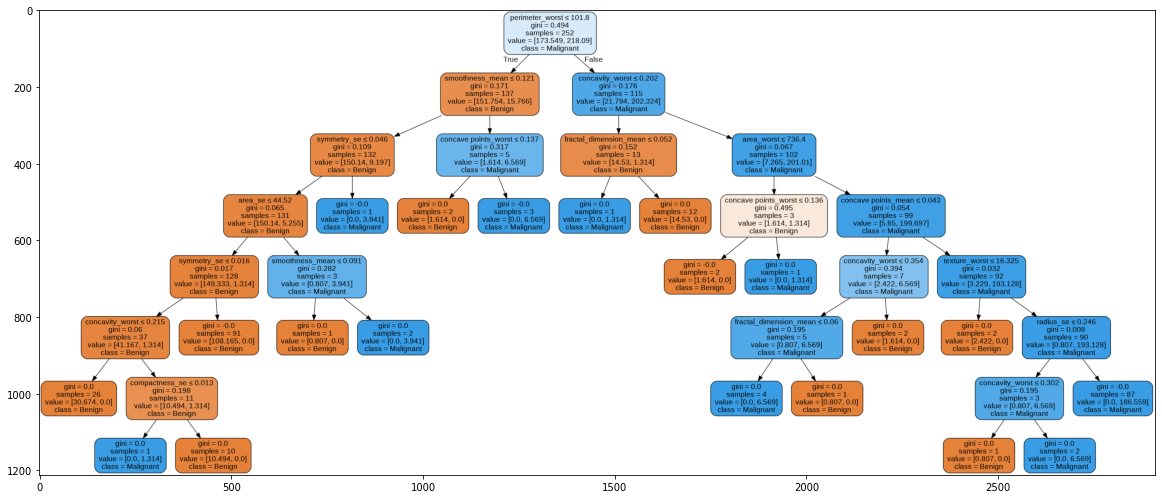

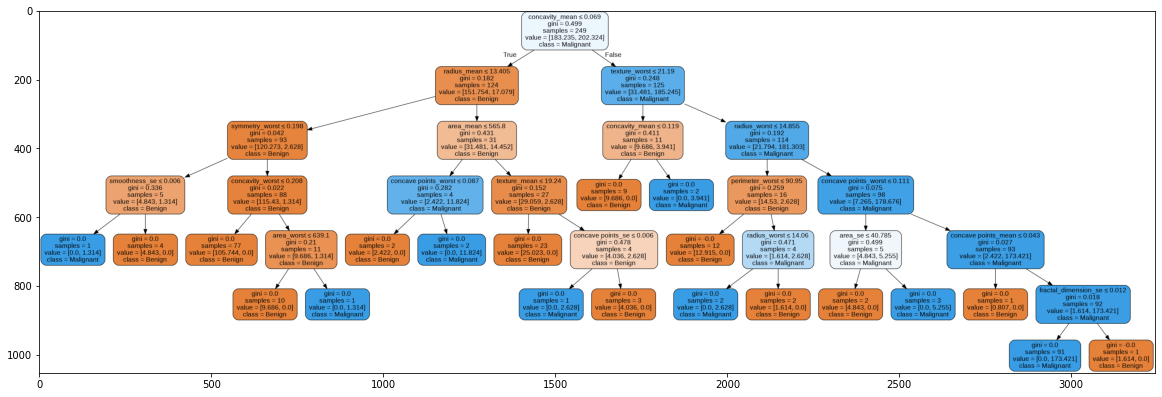

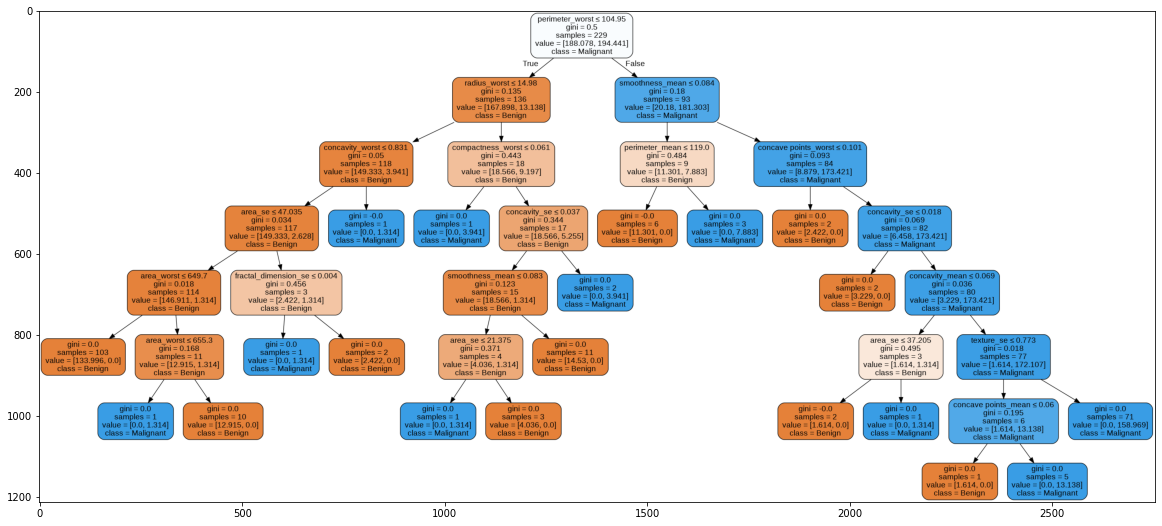

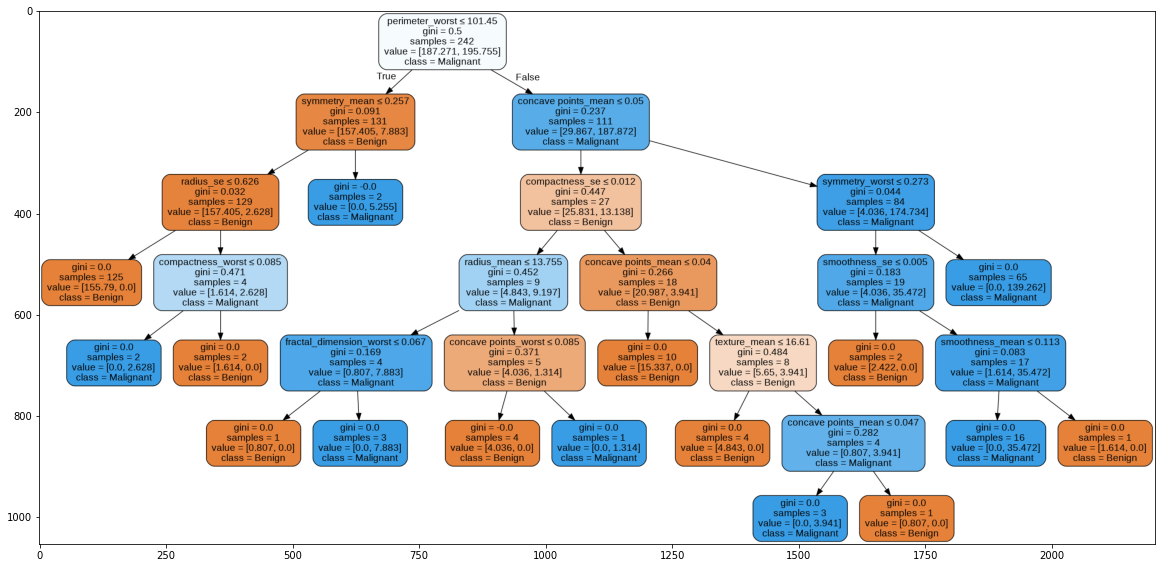

In [94]:
for each in range(len(model_forest_2.estimators_)):
   display_tree(model_forest_2.estimators_[each])

# Extras and Discussion Points

1) What features are common across the trees in the forest? What features did the individual tree value that the forest did not and vice versa?

2) Try tuning the random forest hyper parameters. Start with a grid search and try a random search as well. There are sklearn functions you can use for that:

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

